In [1]:
from data_split import data_splits
import shap
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df_rf_params = pd.read_csv('reports/5_20.0/best_params_rf_5.0_20.0.csv')
df_rf_params.rename(columns={'Unnamed: 0': 'Model'}, inplace=True)
df_rf_params.columns

Index(['Model', 'n_estimators', 'min_samples_split', 'min_samples_leaf',
       'max_depth', 'criterion', 'bootstrap'],
      dtype='object')

In [3]:
X_train_val, X_train, X_val, X_test, y_train_val, y_train, y_val, y_test = data_splits()[2]
X_train.drop(columns=['ResponseId'], inplace=True)

In [5]:
df_m6rf = df_rf_params[df_rf_params['Model'] == 'M6RF']
max_depth = df_rf_params['max_depth'].values[0]
if str(max_depth) == 'nan':
    max_depth = None
else:
    max_depth = int(max_depth)

rf_model = RandomForestClassifier(n_estimators=df_rf_params['n_estimators'].values[0], max_depth=max_depth,min_samples_split=df_rf_params['min_samples_split'].values[0], min_samples_leaf=df_rf_params['min_samples_leaf'].values[0], criterion=df_rf_params['criterion'].values[0], bootstrap=df_rf_params['bootstrap'].values[0], random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=300, random_state=42)

In [6]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test)
shap_values.shape


(3228, 63, 8)

In [7]:
shap_values_1 = explainer.shap_values(X_test)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


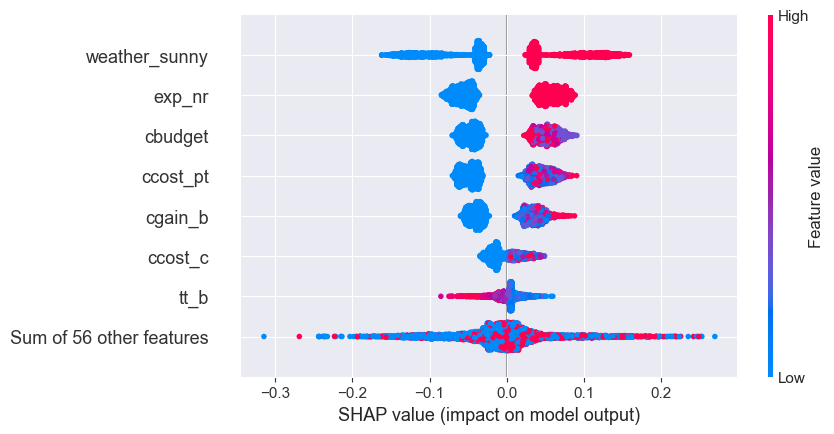

In [30]:
shap.plots.beeswarm(shap_values=shap_values[:,:,6],max_display=8,show= False)
plt.savefig('shap_beeswarm_plot_moco_auto.png', dpi=300, bbox_inches='tight')



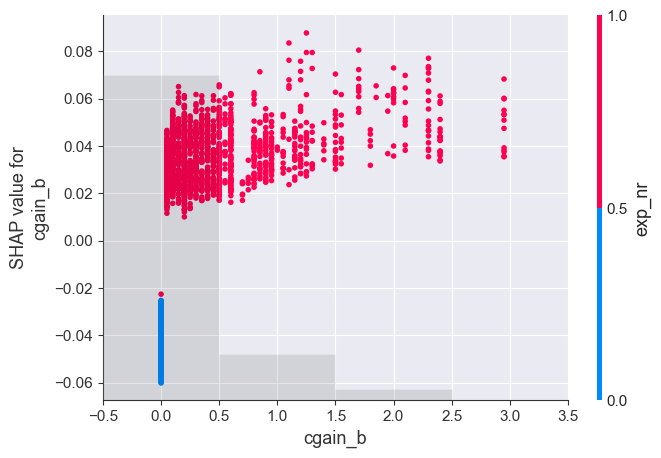

In [10]:
shap.plots.scatter(shap_values[:,"cgain_b",6],color=shap_values[:,"exp_nr",6])

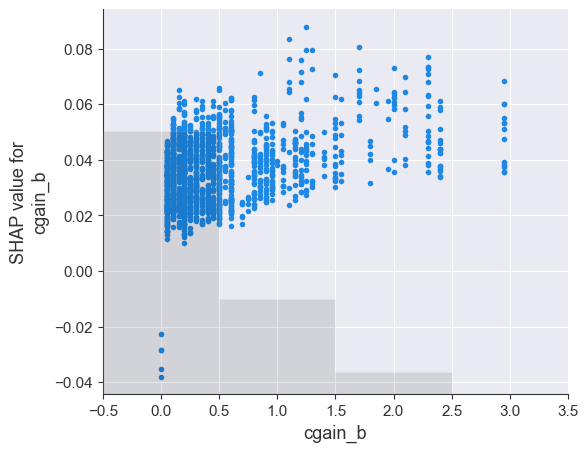

In [33]:
mask = shap_values.data[:, X_test.columns.get_loc("exp_nr")] == 1
filtered_shap_values = shap_values[mask]
shap.plots.scatter(filtered_shap_values[:, "cgain_b", 6],show=False) 
plt.savefig('shap_scatter_plot_moco_bike_cgain_b.png', dpi=300, bbox_inches='tight')

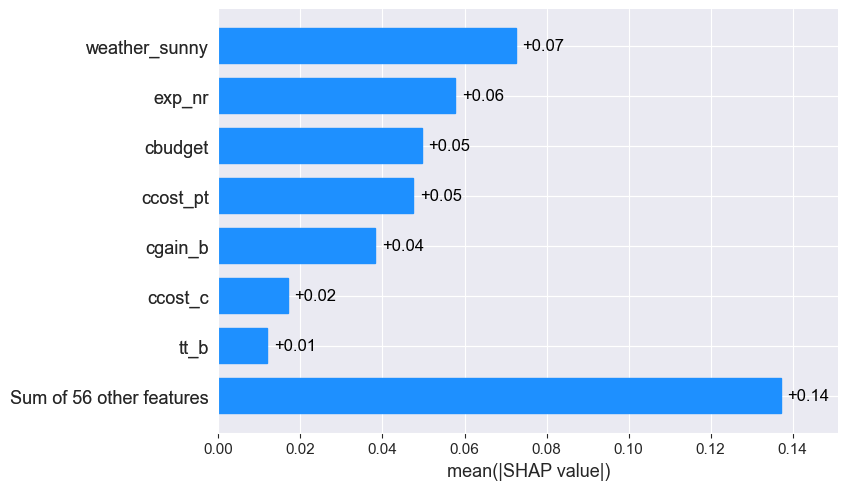

In [41]:
shap.plots.bar(shap_values[:,:,6], max_display=8,show=False)
for bar in plt.gca().patches:
    bar.set_color('#1E90FF')
    
for text in plt.gca().texts:
    text.set_color('black')
plt.savefig('shap_bar_plot_moco_bike_mean_shap_value.png', dpi=300, bbox_inches='tight')

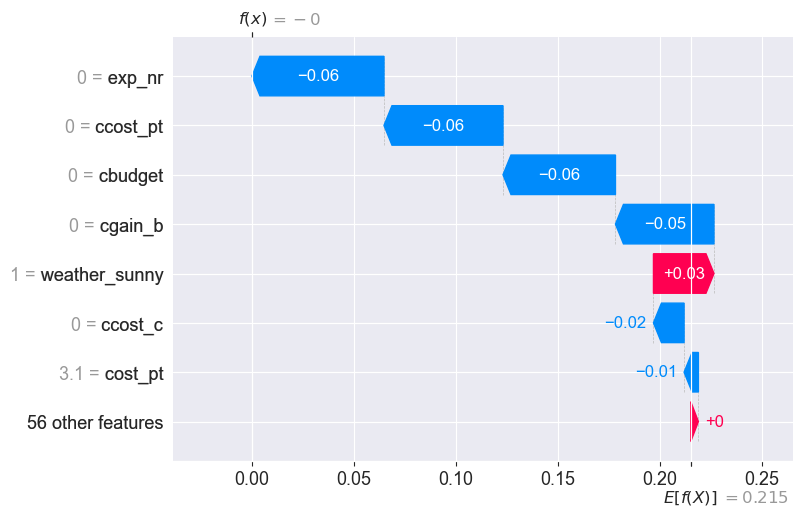

In [32]:
shap.plots.waterfall(shap_values[0,:,6], max_display=8)